<font size= "6">Prepare the Data
<font size= "2">

Uses the Titanic dataset on OpenML.org, which provides info on the survival of passengers on the Titanic and characteristics about the passengers such as age and ticket class.

1. Download the Titanic Data from hbiostat.org as a CSV file named titanic3.csv and save it to the hello_ds folder

2. In the Jupyter notebook, import the pandas and numby libraries

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

<font size= "2">
3. Run the cell using the Run Cell Icon or the Shift+Enter shortcut

4. You can now view the data that was loaded using the Variables Explorer and Data Viewer (Variables Icon on top)

5. A JUPTYER: VARIABLES pane will open at the bottom of VS Code. It contains a list of the variables defined so far in your running kernel

6. To view the data in the Pandas DF select the data viewer icon to the left of the data variable

7. Use the Data Viewer to view, sort, and filter the rows of data

8. Before the data can be graphed, you can't have any issues with it. If you look at the Titanic csv file, one thing you'll notice is that a question mark ("?") was used to identify cells where data wasn't available

While Pandas can read this value into a DataFrame, the result for a column like age is that its data type will be set to an object instead of a numeric data type, which can't be graphed. Cam ne fixed by replacing the question mark with a missing value that pandas can understand. Add the following code





In [2]:
data.replace('nan', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<font size= "2">
9. Now that there are no more issues with the data, you can use seaborn and matplotlib to view how certian columns of the dataset relate to surivability

<AxesSubplot: xlabel='survived', ylabel='fare'>

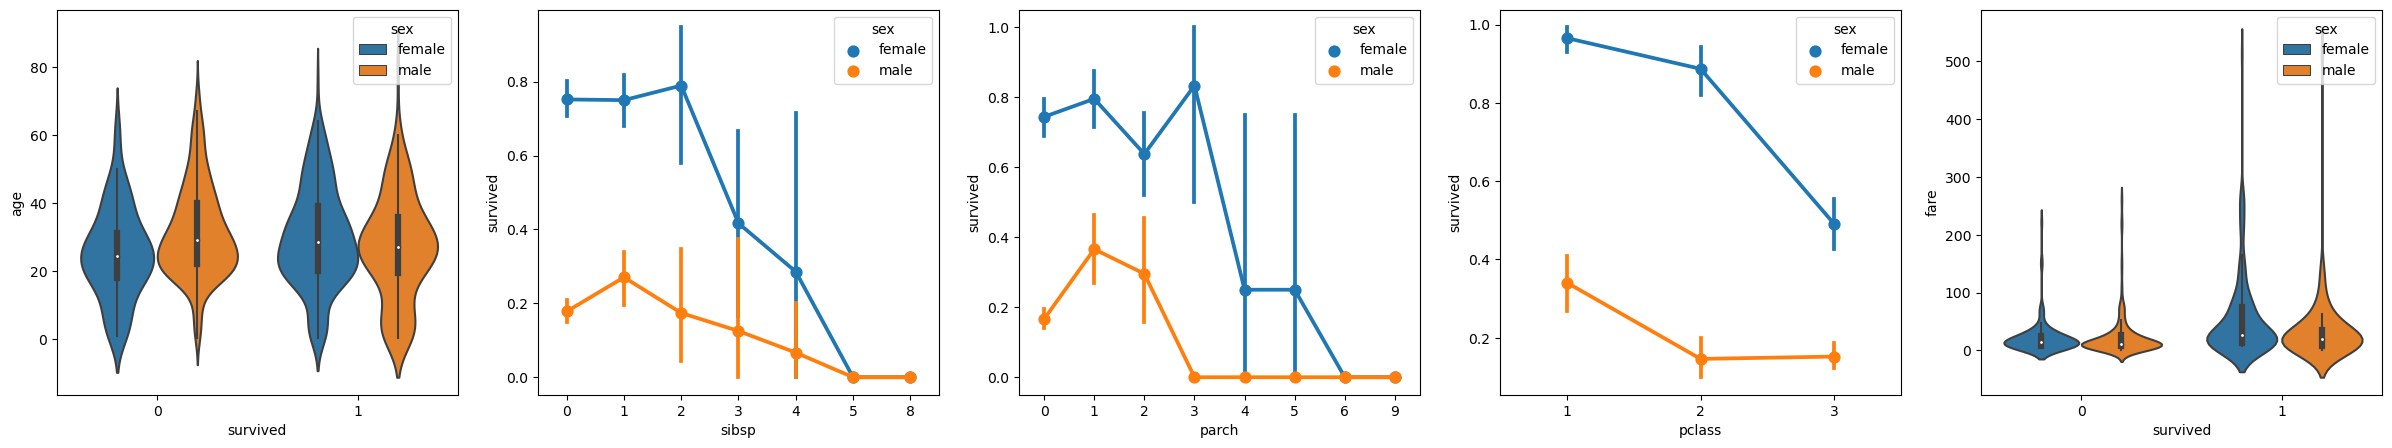

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

10. These grpahs are helpful in seeing replationships between survival and the input variables of the data, but you can use pandas to calculate correlations. First, you need to make all the variables used to be numeric for correlation calculation

In [4]:
data.replace({'male': 1, 'female': 0}, inplace=True)


11. Now, you can analyze the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the result. The following code is to correlate the relationship between all variables and surviva

In [5]:
data.corr().abs()[["survived"]]


C:\Users\aweso\AppData\Local\Temp\ipykernel_11984\1402684040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


12. You can notice that some variables like gender have a high correlation to survial while others like relatives don't.

Let's hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability

In [6]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

C:\Users\aweso\AppData\Local\Temp\ipykernel_11984\3242586923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


<font size= "2">

13. You can see that when looked at from the standpoint of whether a person had relatives, versus how many relatives, there is a higher correlation with survival. You can now drop the low value sibsp and parch columns, and rows with NaN values from the dataset to end up with a dataset that can be used for training a model

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

<font size= "6">Train and evaluate a model
<font size= "2">

You can now create a model

1. Divide up the dataset into training and validation data since it allows you to use a portion of the data to model and a portion to test. The scikit-learn library is that it provides a method specifically for splitting a dataset into training and test data

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

2. Normalize the imputs such that features are treated equally. By normalizing variavles, you can make the ranges of values the same (Ex: he values for age range from ~0-100, while gender is only a 1 or 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

3. There are various machine learning algorithims to choose to model the data. The scikit-learn library provides support for many algorithims. In this tutorial, we are using the Naïve Bayes algorithm, a common algorithm for classification problems. ![Alt text](https://scikit-learn.org/stable/_static/ml_map.png)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

4. With a trained model you can test it against the test data set:

In [11]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


You can see that the algorithim had an around 75% success rate at estimating surival

<font size= "6">(Optional) Use a neural network
<font size= "2">

A neural network is a model that uses weights and activation functions to determine an outcome based on previous inputs. Unlike the previous machine learning algorithim, you don't need to know an ideal algorithim for your problem for neural networks.

1. Import the requierd libraries to create the model. We will use a Sequential neural network (a layered neural network wherein there are multiple layers that feed into each other in sequence).

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

2. After defining the model, we need to add the layers of the neural network.

In [13]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

The first layer will be set to have a dimension of 5 as you have five inputs: sex, pclass, age, relatives, and fare.
The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
The middle layer was kept at 5 for simplicity, although that value could have been different.
The rectified linear unit (relu) activation function is used as a good general activation function for the first two layers, while the sigmoid activation function is required for the final layer as the output you want (of whether a passenger survives or not) needs to be scaled in the range of 0-1 (the probability of a passenger surviving).

You can see the summary of the model with:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


3. Once the model is created, it needs to be compiled (You need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for)

In [15]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5849
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6304
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7404
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.7691
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7691
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7727
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7703
Epoch 11/50
27/27 [

4. Now it's built and trained, so test it with the test data

In [16]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.7990430622009569


Notice that you now have 80% accuracy in predicting survival of passengers compared to the 75% accuracy from the Naive Bayes Classifier tried previously